<a href="https://colab.research.google.com/github/Ronin1289/Generating-Building-Drawings-Using-Image-Processing/blob/Experiments/EXPERIMENT_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RANSAC
Used for line attraction adn drawing lines


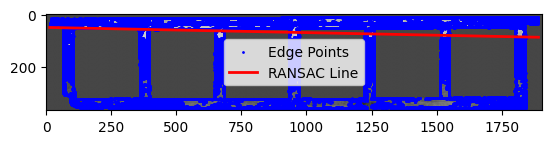

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor

# Load image
image = cv2.imread("/content/drive/MyDrive/DATASETS/gsck1.png", cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, 50, 150)

# Get edge points
y_coords, x_coords = np.where(edges > 0)  # Get nonzero pixel coordinates
points = np.column_stack((x_coords, y_coords))  # Convert to (x, y) format

# Fit RANSAC line model
ransac = RANSACRegressor()
ransac.fit(points[:, 0].reshape(-1, 1), points[:, 1])  # Fit (x, y)

# Get line equation
x_range = np.array([min(x_coords), max(x_coords)]).reshape(-1, 1)
y_pred = ransac.predict(x_range)

# Plot results
plt.imshow(image, cmap="gray")
plt.scatter(x_coords, y_coords, s=1, color="blue", label="Edge Points")
plt.plot(x_range, y_pred, color="red", linewidth=2, label="RANSAC Line")
plt.legend()
plt.show()


##Hough Transform

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = img.copy()

# Apply Canny edge detection
edges = cv2.Canny(image, 50, 150)

# Apply Hough Line Transform
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)

# Convert image to color for visualization
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw detected lines
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_color, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(edges, cmap='gray'), plt.title("Canny Edges")
plt.subplot(1, 2, 2), plt.imshow(image_color), plt.title("Hough Lines")
plt.show()
